In [108]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [109]:

# This is the path where you want to search
path = "/home/julius/Documents/Julius_03_x_auswertung"

# this is the extension you want to detect
extension = '.csv'
all_files = []
for root, dirs_list, files_list in os.walk(path):
    for file_name in files_list:
        if os.path.splitext(file_name)[-1] == extension:
            file_name_path = os.path.join(root, file_name)
            all_files.append(file_name_path)  # This is the full path of the filt

all_files = sorted(all_files)
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)

master_df = pd.concat(li, axis=0, ignore_index=True)

master_df.head(10)

,Subsample,File,Scene,Object,Max,Min,Median,Mean,Std,Var
0,10,depth_000.png,001_standing_coated,canister,406.0,0.0,17.0,58.268998,100.877906,10176.351947
1,10,depth_000.png,001_standing_coated,small_bottle,NaN,NaN,NaN,NaN,NaN,NaN
2,10,depth_000.png,001_standing_coated,medium_bottle,757.0,0.0,26.0,51.467119,94.278780,8888.488346
3,10,depth_000.png,001_standing_coated,large_bottle,472.0,0.0,8.0,53.588611,72.684847,5283.086952
4,10,depth_001.png,001_standing_coated,canister,242.0,0.0,11.0,14.449796,20.141010,405.660289
5,10,depth_001.png,001_standing_coated,small_bottle,258.0,0.0,10.0,72.630111,92.554413,8566.319315
6,10,depth_001.png,001_standing_coated,medium_bottle,517.0,0.0,18.0,43.245498,59.422004,3530.974505
7,10,depth_001.png,001_standing_coated,large_bottle,509.0,0.0,7.0,15.436519,20.953587,439.052819
8,10,depth_002.png,001_standing_coated,canister,426.0,0.0,12.0,30.289318,62.692147,3930.305254
9,10,depth_002.png,001_standing_coated,small_bottle,464.0,0.0,8.0,9.714692,13.824743,191.123521


In [110]:
#df_grouped = master_df.groupby(["Object", "Subsample", "Scene"])#plot(kind='line', subplots=True)

#data = master_df.groupby(["Scene", "Subsample", "Object"])['Mean'].mean().to_frame()
data = master_df.groupby(["Scene", "Subsample"])['Mean'].mean().to_frame()

data
print(data.to_string())

                                     Mean
Scene               Subsample            
001_standing_coated 10         210.584374
                    20         154.493229
                    30          60.441404
                    40          36.807870
                    50          21.312055
                    60          15.897636
                    80          15.023270
                    100         15.525917
                    200         14.308617
                    300         13.297882
002_lying_coated    10         241.715132
                    20          59.005037
                    30          29.152568
                    40          22.722784
                    50          20.042594
                    60          19.908942
                    80          17.823472
                    100         18.064532
                    200         19.026217
                    300         17.328805
003_standing_liquid 10         244.563663
                    20          75

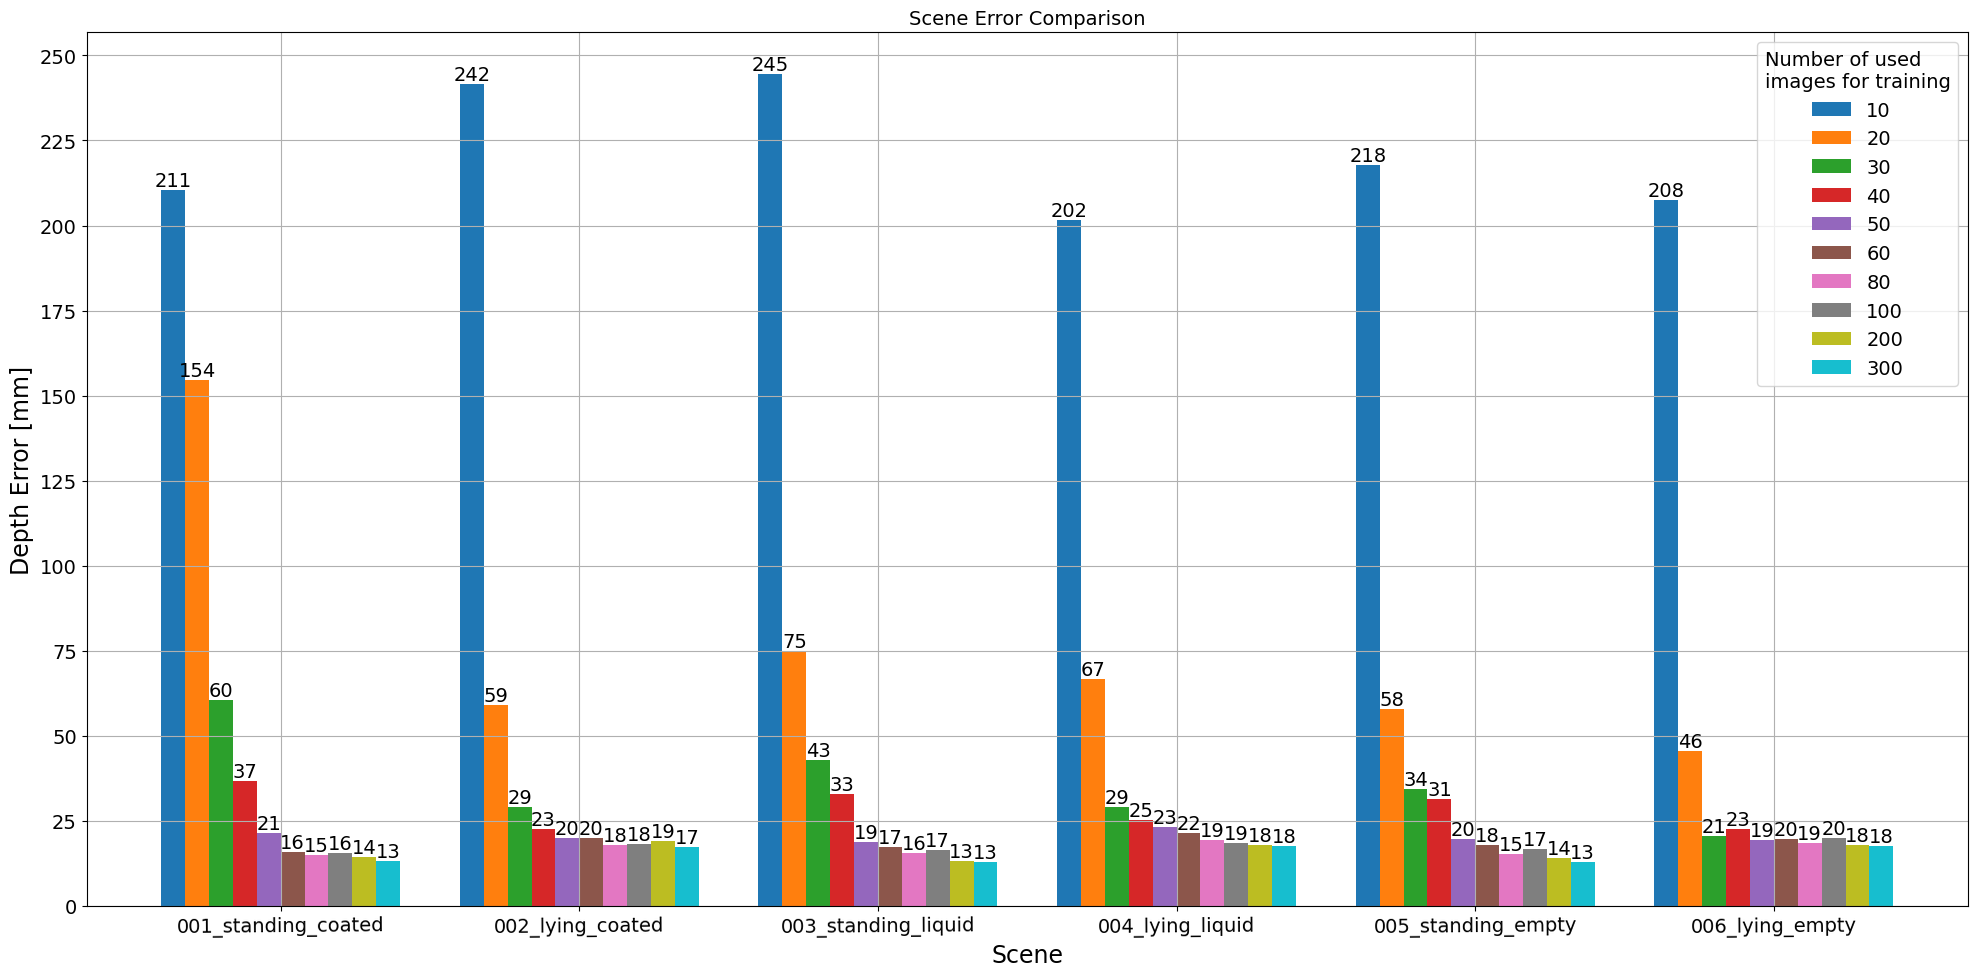

In [197]:

SMALL_SIZE = 14
MEDIUM_SIZE = 17
BIGGER_SIZE = 50

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


ax = data.unstack().plot(kind='bar', figsize=(20,10), title="Scene Error Comparison", grid=True, yticks=np.arange(0,251,25), xlabel="Scene", ylabel="Depth Error [mm]", rot=0.5, width=0.8)
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%.0f', label_type='edge')
    

plt.legend(["10","20","30","40","50","60","80","100","200","300"],
            loc='upper right', title='Number of used \nimages for training')

plt.tight_layout()

#print(data.unstack())

In [ ]:
# # Create a list of the Scenes
# scenes = list(data.index.get_level_values('Scene').unique())

# # Create a list of the Objects
# subsamples = list(data.index.get_level_values('Subsample').unique())

# # plot lineplot for each scene
# #fig, axs = plt.subplots(len(scenes), len(objects))
# for scene in scenes:
#     fig = plt.figure(figsize=(14, 7))
#     df_scene = data.loc[scene]
    
#     plt.bar(df_scene.index.get_level_values('Subsample'), df_scene['Mean'], label=scene)

#     # set the legend
#     plt.legend()

#     # set the x and y labels
#     plt.yticks(np.arange(0, 301, 50))
#     plt.xticks([0,10,20,30,40,50,60,80,100,200,300])
#     plt.xlabel('Number of used training images')
#     plt.ylabel('Error [mm]')
#     plt.grid()
#     plt.title("Mean depth error per scene")

#     # show the plot
# plt.show()